In [294]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,r2_score


# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import KFold,GridSearchCV


In [41]:
df=pd.read_excel("Global_Superstore2.csv")

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  float64
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [43]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298.000000,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.000000,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650000,7.000000,0.000000,762.184500,933.570000,Critical
1,26341.000000,IN-2013-77878,2013-05-02 00:00:00,2013-07-02 00:00:00,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395000,9.000000,0.100000,-288.765000,923.630000,Critical
2,25330.000000,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171000,9.000000,0.100000,919.971000,915.490000,Medium
3,13524.000000,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510000,5.000000,0.100000,-96.540000,910.160000,Medium
4,47221.000000,SG-2013-4320,2013-05-11 00:00:00,2013-06-11 00:00:00,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960000,8.000000,0.000000,311.520000,903.040000,Critical


In [44]:
df.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
dtype: int64

In [45]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [49]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [50]:
df1=df.drop('Postal Code',axis=1)

In [51]:
df1.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298.000000,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650000,7.000000,0.000000,762.184500,933.570000,Critical
1,26341.000000,IN-2013-77878,2013-05-02 00:00:00,2013-07-02 00:00:00,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395000,9.000000,0.100000,-288.765000,923.630000,Critical
2,25330.000000,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171000,9.000000,0.100000,919.971000,915.490000,Medium
3,13524.000000,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510000,5.000000,0.100000,-96.540000,910.160000,Medium
4,47221.000000,SG-2013-4320,2013-05-11 00:00:00,2013-06-11 00:00:00,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960000,8.000000,0.000000,311.520000,903.040000,Critical


In [52]:
df1["Order_Year"]=pd.to_datetime(df1["Order Date"]).dt.year

In [53]:
df1.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_Year
0,32298.000000,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650000,7.000000,0.000000,762.184500,933.570000,Critical,2012
1,26341.000000,IN-2013-77878,2013-05-02 00:00:00,2013-07-02 00:00:00,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395000,9.000000,0.100000,-288.765000,923.630000,Critical,2013
2,25330.000000,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171000,9.000000,0.100000,919.971000,915.490000,Medium,2013
3,13524.000000,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510000,5.000000,0.100000,-96.540000,910.160000,Medium,2013
4,47221.000000,SG-2013-4320,2013-05-11 00:00:00,2013-06-11 00:00:00,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960000,8.000000,0.000000,311.520000,903.040000,Critical,2013


In [54]:
df1.drop_duplicates(subset="Order ID",inplace=True)

In [55]:
df1.nunique()

Row ID            25035
Order ID          25035
Order Date         1428
Ship Date          1464
Ship Mode             4
Customer ID        1589
Customer Name       795
Segment               3
City               3601
State              1094
Country             147
Market                7
Region               13
Product ID         8815
Category              3
Sub-Category         17
Product Name       3601
Sales             15950
Quantity             14
Discount             27
Profit            15782
Shipping Cost      9141
Order Priority        4
Order_Year            4
dtype: int64

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25035 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          25035 non-null  float64
 1   Order ID        25035 non-null  object 
 2   Order Date      25035 non-null  object 
 3   Ship Date       25035 non-null  object 
 4   Ship Mode       25035 non-null  object 
 5   Customer ID     25035 non-null  object 
 6   Customer Name   25035 non-null  object 
 7   Segment         25035 non-null  object 
 8   City            25035 non-null  object 
 9   State           25035 non-null  object 
 10  Country         25035 non-null  object 
 11  Market          25035 non-null  object 
 12  Region          25035 non-null  object 
 13  Product ID      25035 non-null  object 
 14  Category        25035 non-null  object 
 15  Sub-Category    25035 non-null  object 
 16  Product Name    25035 non-null  object 
 17  Sales           25035 non-null 

In [57]:
df_num=df1.select_dtypes(exclude="object")
df_num.head()

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost,Order_Year
0,32298.000000,2309.650000,7.000000,0.000000,762.184500,933.570000,2012
1,26341.000000,3709.395000,9.000000,0.100000,-288.765000,923.630000,2013
2,25330.000000,5175.171000,9.000000,0.100000,919.971000,915.490000,2013
3,13524.000000,2892.510000,5.000000,0.100000,-96.540000,910.160000,2013
4,47221.000000,2832.960000,8.000000,0.000000,311.520000,903.040000,2013


In [69]:
df_cat=df1.select_dtypes(include="object")
df_cat.shape

(25035, 17)

In [59]:
df[df["Category"]=="Furniture"]["Sub-Category"].value_counts()

Chairs         3434
Furnishings    3170
Bookcases      2411
Tables          861
Name: Sub-Category, dtype: int64

In [60]:
df_cat.nunique()

Order ID          25035
Order Date         1428
Ship Date          1464
Ship Mode             4
Customer ID        1589
Customer Name       795
Segment               3
City               3601
State              1094
Country             147
Market                7
Region               13
Product ID         8815
Category              3
Sub-Category         17
Product Name       3601
Order Priority        4
dtype: int64

In [70]:
df_cat.shape

(25035, 17)

In [71]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [73]:
df_cat.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Country', 'Market',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Order Priority'],
      dtype='object')

In [74]:
df_cat.drop(['Order ID', 'Order Date', 'Ship Date','Customer ID','Product ID'],axis=1,inplace=True)

In [75]:
df_cat1=pd.DataFrame(oe.fit_transform(df_cat),columns=df_cat.columns)

In [76]:
df_cat1.head()

,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Order Priority
0,1.000000,632.000000,0.000000,2262.000000,703.000000,139.000000,6.000000,6.000000,2.000000,0.000000,2625.000000,0.000000
1,2.000000,413.000000,1.000000,3483.000000,702.000000,6.000000,0.000000,9.000000,0.000000,5.000000,2407.000000,0.000000
2,0.000000,181.000000,0.000000,492.000000,820.000000,6.000000,0.000000,9.000000,2.000000,13.000000,2384.000000,3.000000
3,0.000000,424.000000,2.000000,373.000000,145.000000,47.000000,4.000000,3.000000,2.000000,13.000000,2306.000000,3.000000
4,1.000000,632.000000,0.000000,848.000000,270.000000,110.000000,1.000000,0.000000,2.000000,6.000000,3020.000000,0.000000


In [77]:
df_cat1.shape

(25035, 12)

In [78]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [79]:
b=mm.fit_transform(df_num)

In [80]:
df_num1=pd.DataFrame(b,columns=df_num.columns)

In [81]:
df_num1.head()

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost,Order_Year
0,0.629706,0.131953,0.461538,0.000000,0.490812,1.000000,0.333333
1,0.513560,0.211941,0.615385,0.117647,0.420749,0.989353,0.666667
2,0.493849,0.295703,0.615385,0.117647,0.501331,0.980633,0.666667
3,0.263663,0.165260,0.307692,0.117647,0.433564,0.974924,0.666667
4,0.920665,0.161857,0.538462,0.000000,0.460768,0.967298,0.666667


In [82]:
df_tranformed=pd.concat([df_num1,df_cat1],axis=1)

In [83]:
df_tranformed.head()

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost,Order_Year,Ship Mode,Customer Name,Segment,City,State,Country,Market,Region,Category,Sub-Category,Product Name,Order Priority
0,0.629706,0.131953,0.461538,0.000000,0.490812,1.000000,0.333333,1.000000,632.000000,0.000000,2262.000000,703.000000,139.000000,6.000000,6.000000,2.000000,0.000000,2625.000000,0.000000
1,0.513560,0.211941,0.615385,0.117647,0.420749,0.989353,0.666667,2.000000,413.000000,1.000000,3483.000000,702.000000,6.000000,0.000000,9.000000,0.000000,5.000000,2407.000000,0.000000
2,0.493849,0.295703,0.615385,0.117647,0.501331,0.980633,0.666667,0.000000,181.000000,0.000000,492.000000,820.000000,6.000000,0.000000,9.000000,2.000000,13.000000,2384.000000,3.000000
3,0.263663,0.165260,0.307692,0.117647,0.433564,0.974924,0.666667,0.000000,424.000000,2.000000,373.000000,145.000000,47.000000,4.000000,3.000000,2.000000,13.000000,2306.000000,3.000000
4,0.920665,0.161857,0.538462,0.000000,0.460768,0.967298,0.666667,1.000000,632.000000,0.000000,848.000000,270.000000,110.000000,1.000000,0.000000,2.000000,6.000000,3020.000000,0.000000


In [84]:
df_tranformed.shape

(25035, 19)

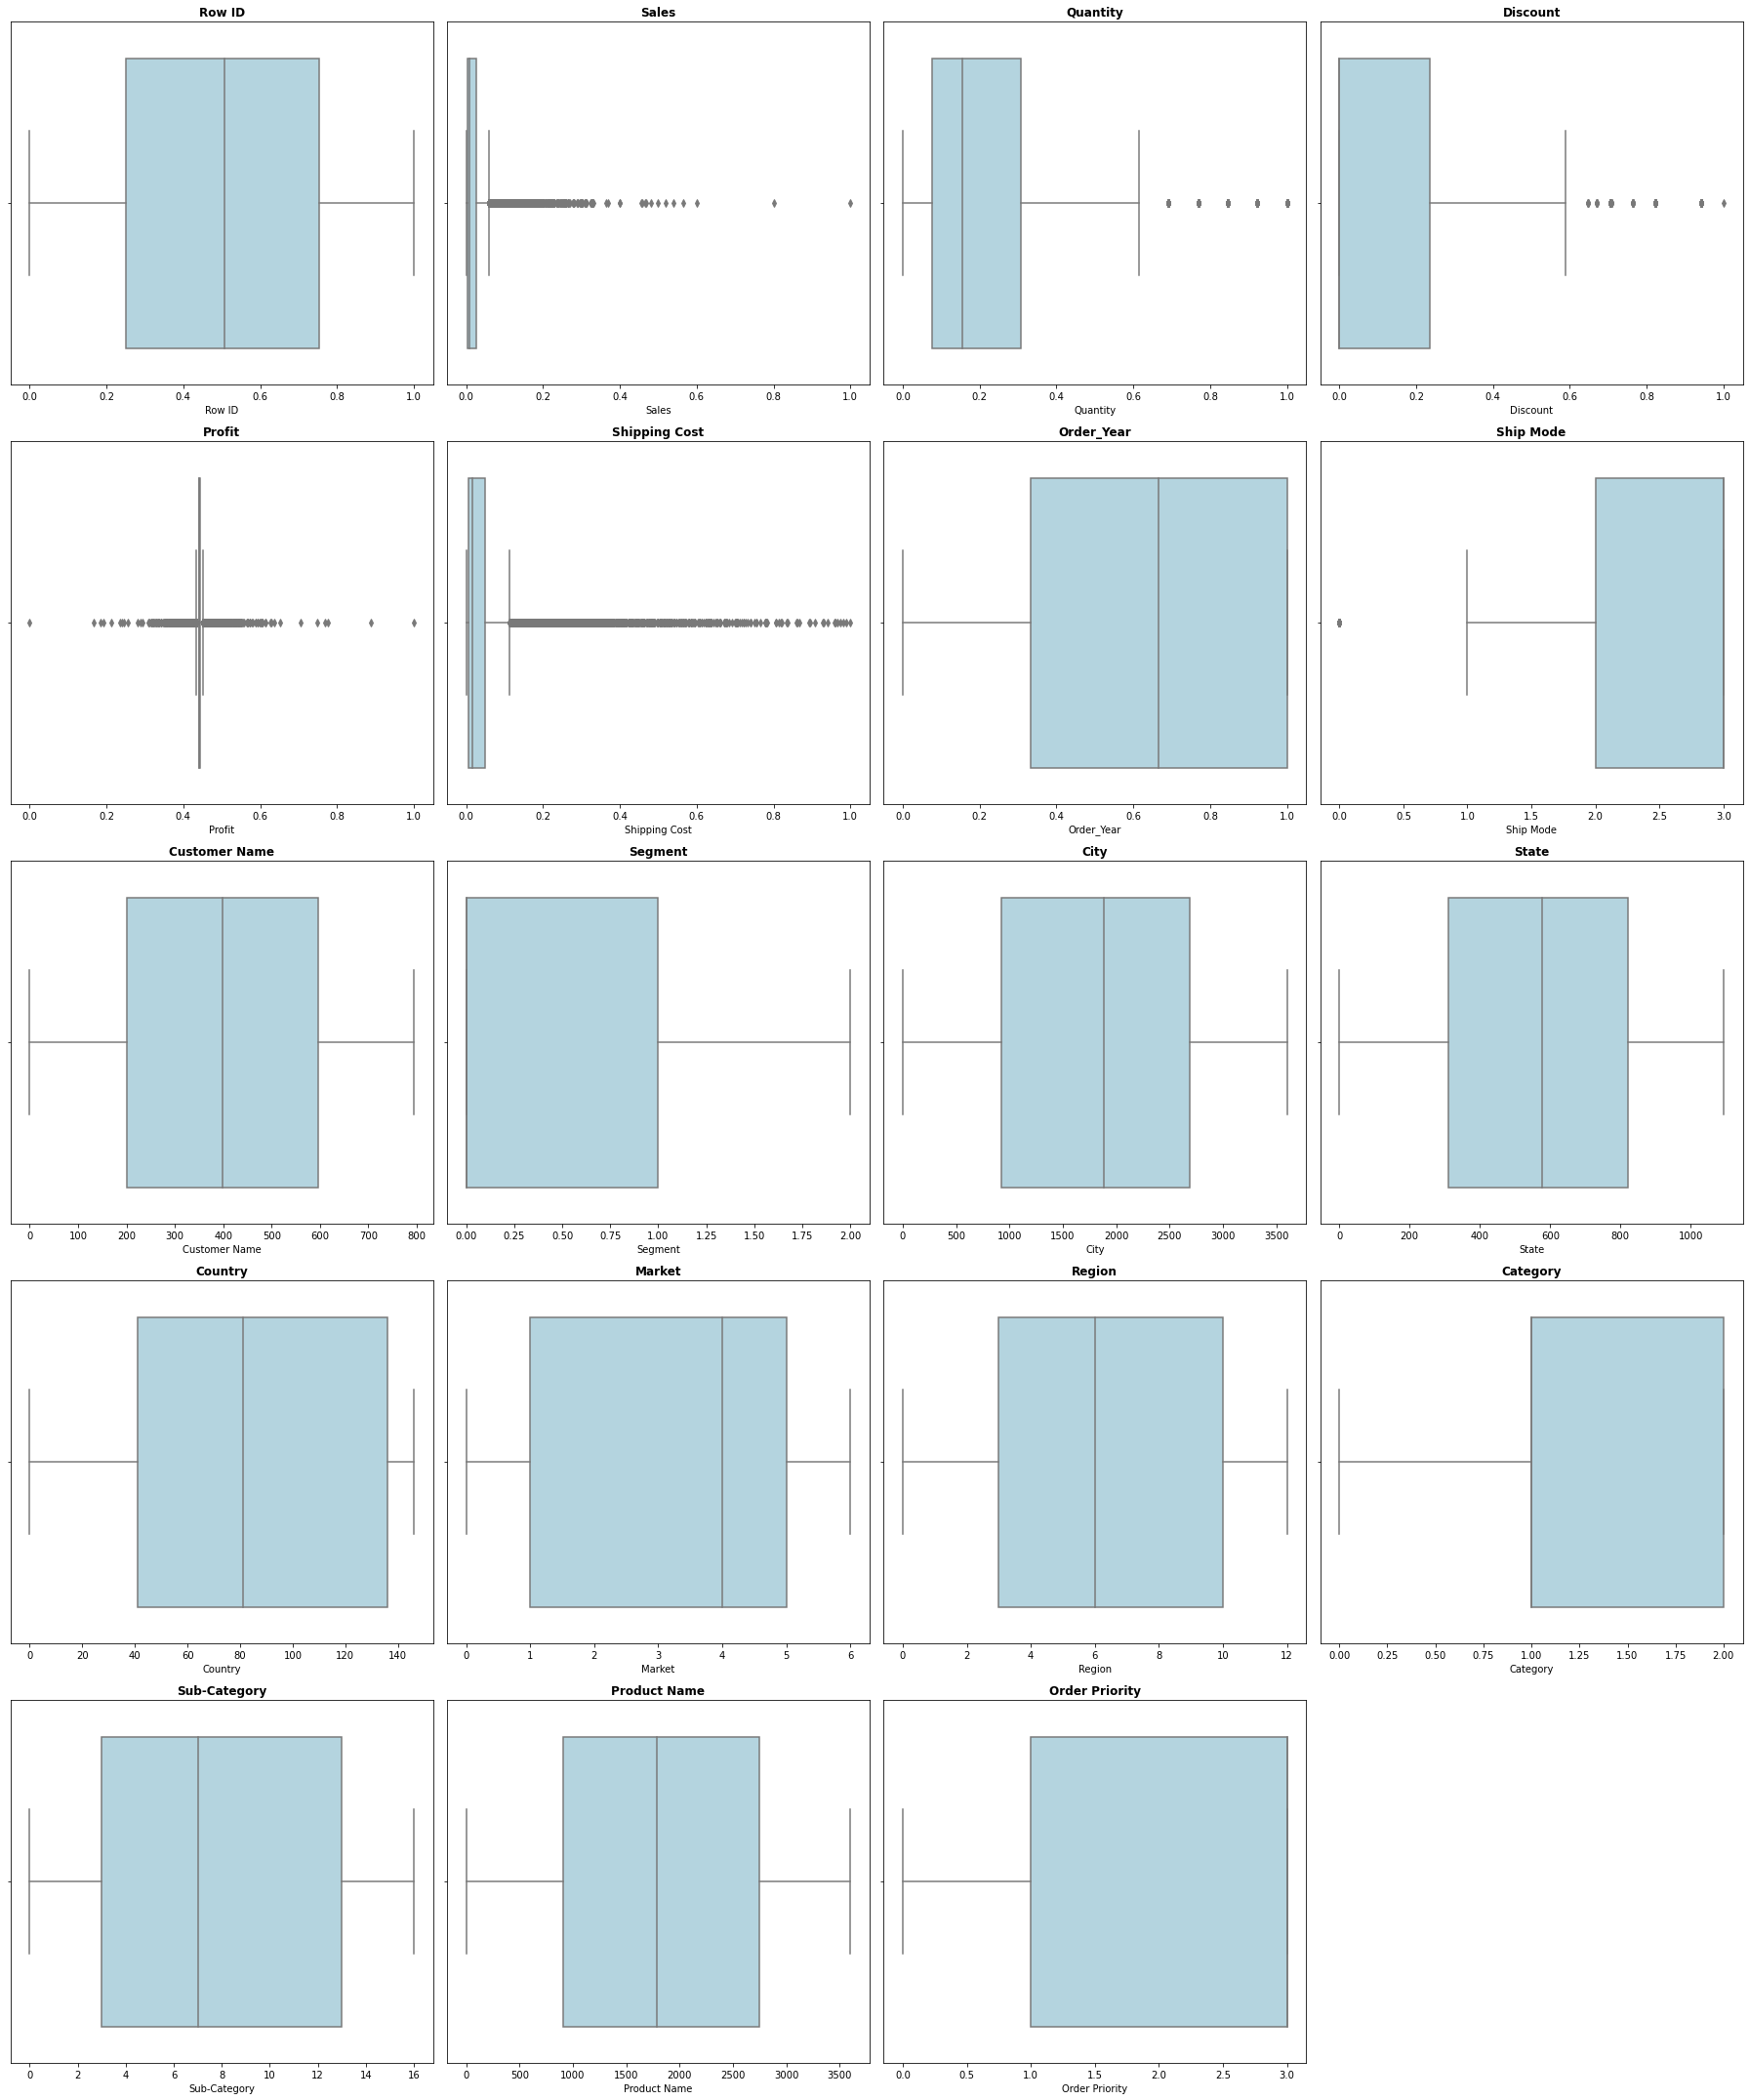

In [90]:
n=1
plt.figure(figsize=(25,30))
for i in df_tranformed.columns:
    plt.subplot(5,4,n)
    sns.boxplot(df_tranformed[i],color="lightblue")
    n=n+1
    plt.title(i,weight="bold")
    plt.tight_layout()

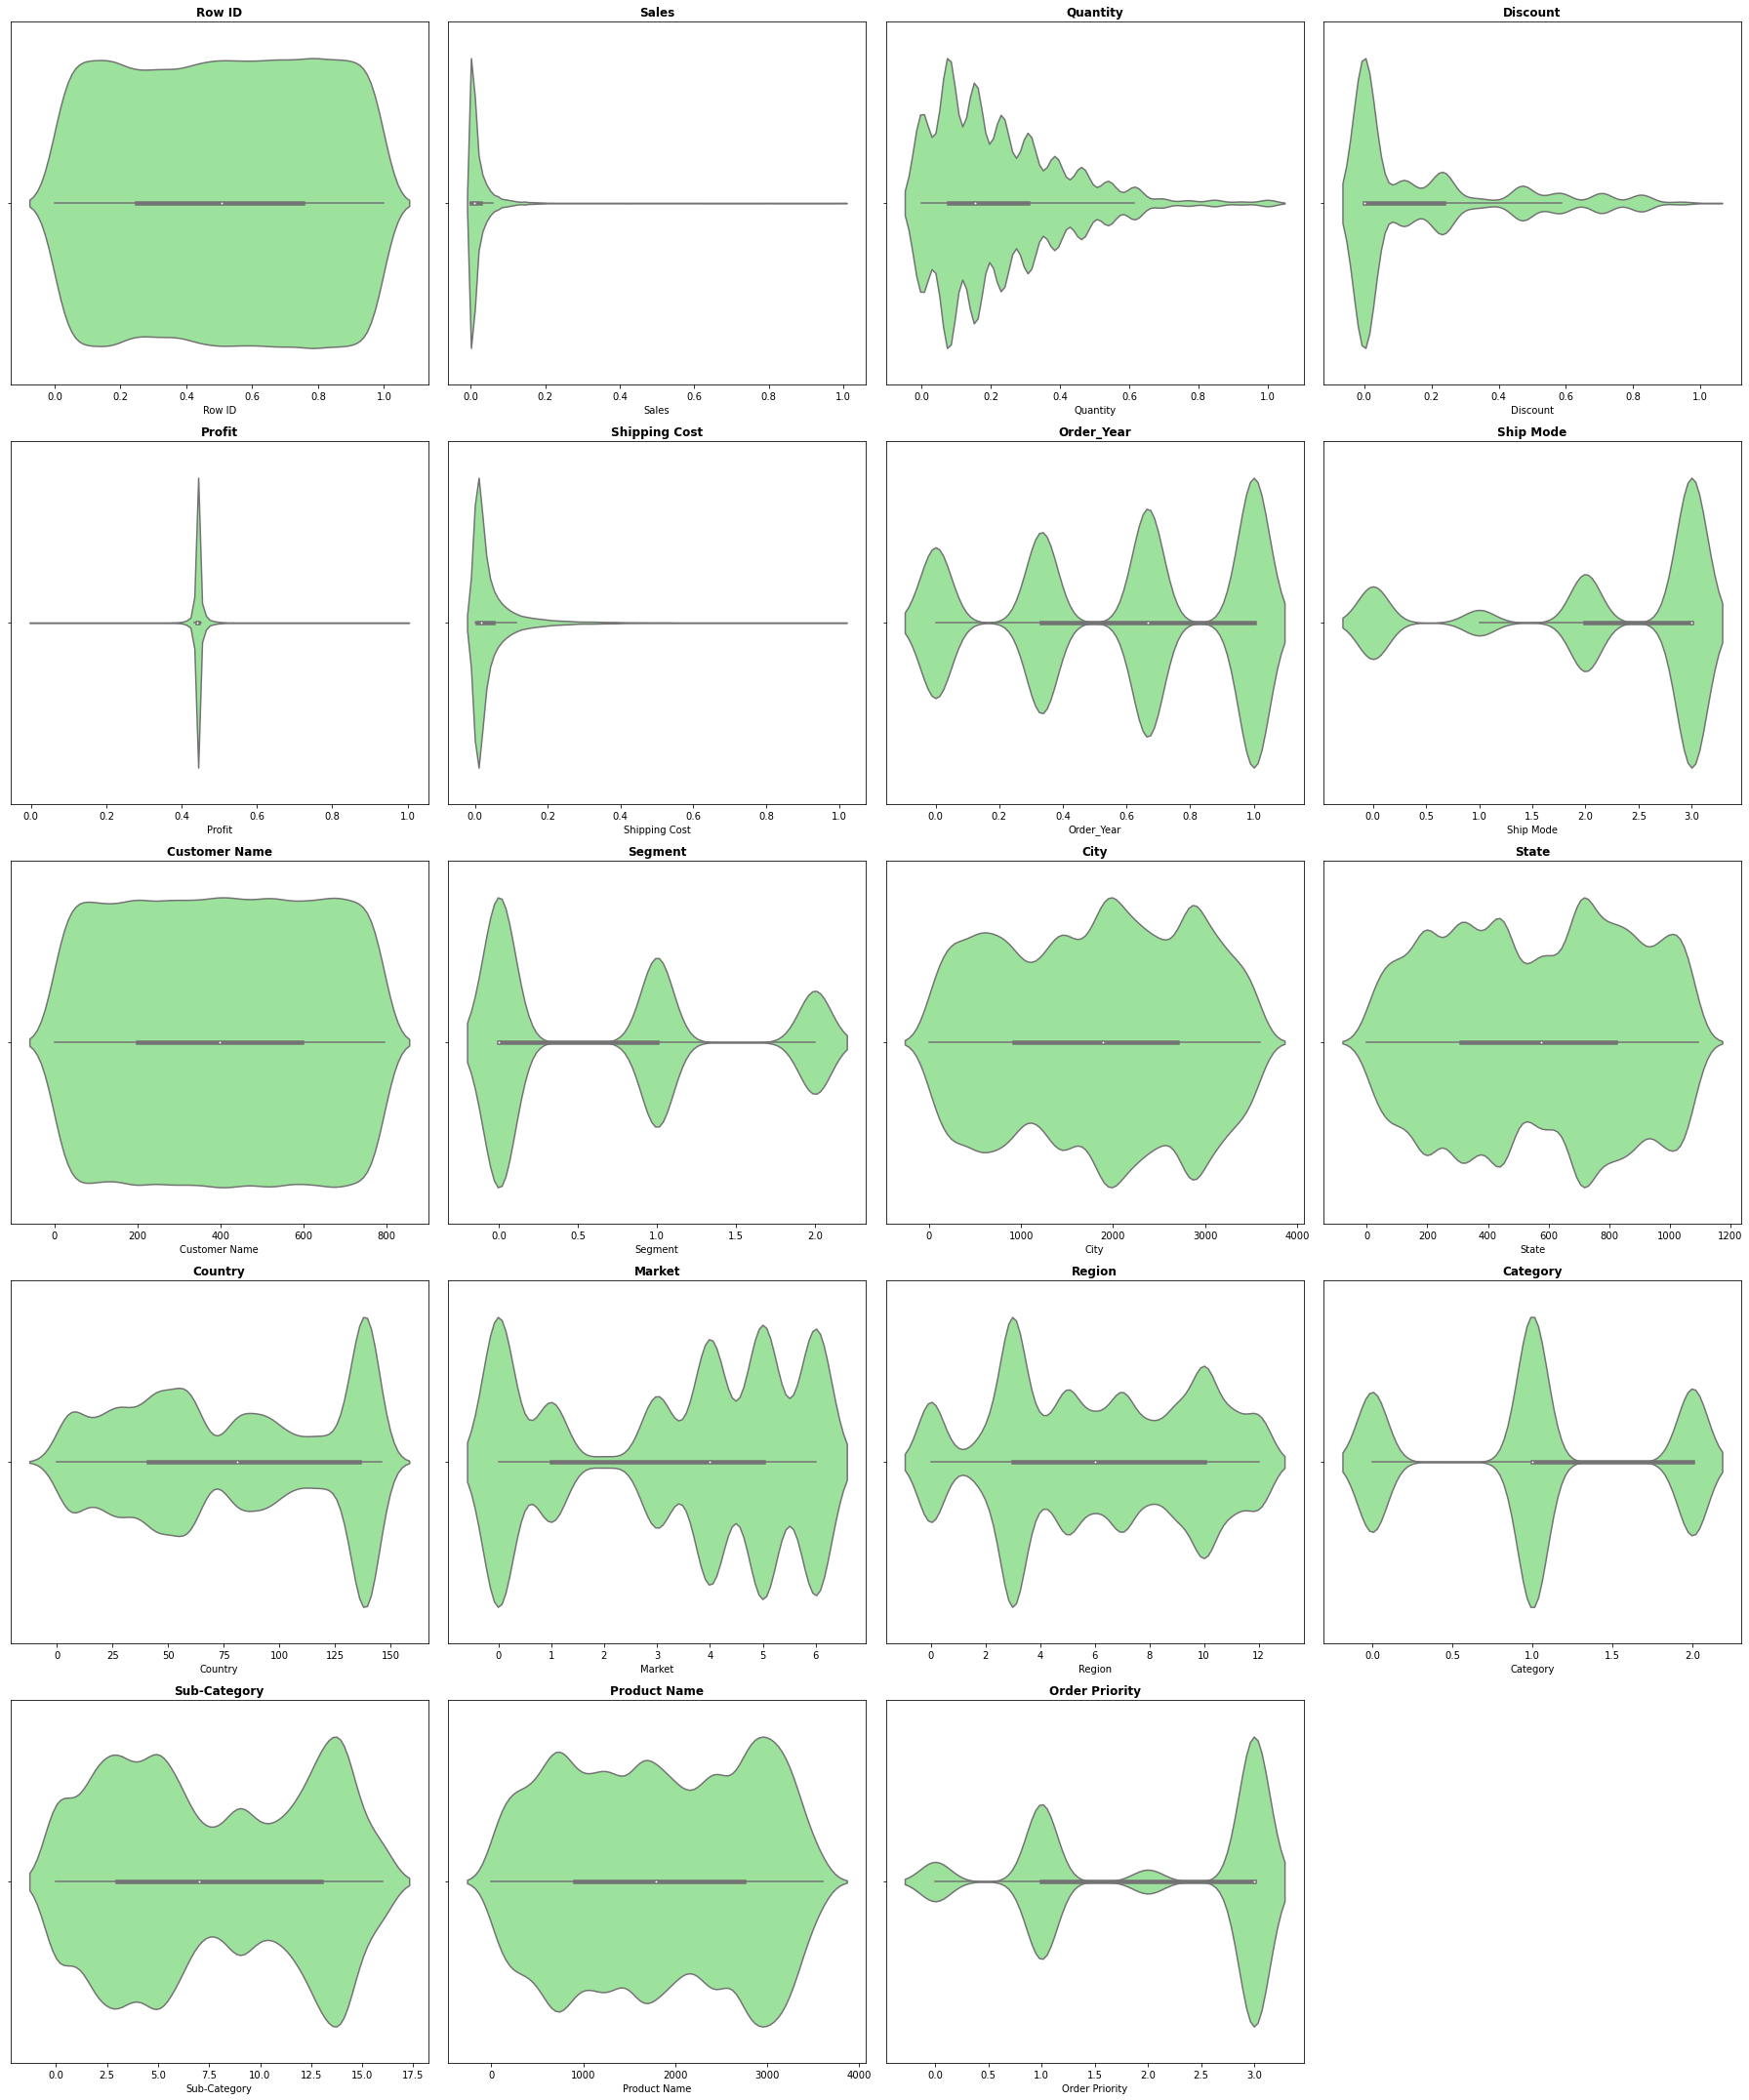

In [92]:
n=1
plt.figure(figsize=(25,30))
for i in df_tranformed.columns:
    plt.subplot(5,4,n)
    sns.violinplot(df_tranformed[i],color="lightgreen")
    n=n+1
    plt.title(i,weight="bold")
    plt.tight_layout()

In [93]:
# a=model name b=x_train
def get_train_pred(model,x_train):
    train_pred=np.array(model.predict(x_train))
    return train_pred

In [119]:
#  a= model name , b=x_test
def get_test_pred(model,x_test):
    test_pred=np.array(model.predict(x_test))
    return test_pred
                    

In [120]:
def R_Square_train(y_train,train_pred):
    b=r2_score(y_train,train_pred)
    return b

In [121]:
# a= model name
def R_Square_test(y_test,test_pred):
    b=r2_score(y_test,test_pred)
    return b

In [122]:
#  a= y_train b=train_pred
def get_Train_MSE(y_train,train_pred):
    #train_pred = get_train_pred(model_name,x_train)
    x=round(mean_squared_error(y_train,train_pred),4)
    return x

#  a= y_test b=test_pred
def get_Test_MSE(y_test,test_pred):
    #test_pred = get_test_pred(model_name,x_test)
    x=round(mean_squared_error(y_test,test_pred),4)
    return x

In [123]:
#  a= y_train b=train_pred
def get_Train_MAE(y_train,train_pred):
    #get_train_pred(model_name,x_train)
    x=round(mean_absolute_error(y_train,train_pred),4)
    return x

#  a= y_test b=test_pred
def get_Test_MAE(y_test,test_pred):
    #get_test_pred(model_name,x_test)
    x=round(mean_absolute_error(y_test,test_pred),4)
    return x

In [124]:
#  a= y_train b=train_pred
def get_Train_RMSE(y_train,train_pred):
    #get_train_pred(model_name,x_train)
    x=round(rmse(y_train,train_pred),4)
    return x

#  a= y_test b=test_pred
def get_Test_RMSE(y_test,test_pred):
    #test_pred = get_test_pred(model_name,x_test)
    x=round(rmse(y_test,test_pred),4)
    return x

In [125]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

#  a= y_train b=train_pred
def get_Train_MAPE(y_train,train_pred):
    #get_train_pred(model_name,x_train)
    x=mape(y_train,train_pred)
    return x

#  a= y_test b=test_pred
def get_Test_MAPE(y_test,test_pred):
    #test_pred = get_test_pred(model_name,x_test)
    x=mape(y_test,test_pred)
    return x

In [126]:
Score_Card=pd.DataFrame(columns=["Algorithm_Name","Model_Name","R_Square_train","R_Square_test","Train_MSE","Test_MSE",
                                 "Train_MAE","Test_MAE","Train_RMSE","Test_RMSE","Train_MAPE","Test_MAPE"])

In [129]:
def Update_Score_Card(Algorithm_Name, model_name,model, x_train,x_test,y_train,y_test):
    global Score_Card
    train_pred=get_train_pred(model,x_train)
    test_pred = get_test_pred(model,x_test)

    Score_Card=Score_Card.append({
        "Algorithm_Name":Algorithm_Name,
        "Model_Name":model_name,
        "R_Square_train":R_Square(y_train,train_pred),
        "R_Square_test":R_Square(y_test,test_pred),
        "Train_MSE":get_Train_MSE(y_train,train_pred),
        "Test_MSE":get_Test_MSE(y_test,test_pred),
        "Train_MAE":get_Train_MAE(y_train,train_pred),
        "Test_MAE":get_Test_MAE(y_test,test_pred),
        "Train_RMSE":get_Train_RMSE(y_train,train_pred),
        "Test_RMSE":get_Test_RMSE(y_test,test_pred),
        "Train_MAPE":get_Train_MAPE(y_train,train_pred),
        "Test_MAPE":get_Test_MAPE(y_test,test_pred) 
        },ignore_index=True)

In [130]:
df_tranformed.columns

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Order_Year', 'Ship Mode', 'Customer Name', 'Segment', 'City', 'State',
       'Country', 'Market', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Order Priority'],
      dtype='object')

In [132]:
df_tranformed.shape

(25035, 18)

In [133]:
y=df_tranformed["Sales"]
x=df_tranformed.drop("Sales",axis=1)
x=sm.add_constant(x)

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (17524, 18)
x_test (7511, 18)
y_train (17524,)
y_test (7511,)


In [135]:
OLS_Model_1=sm.OLS(y_train,x_train).fit()
print(OLS_Model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     2718.
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        23:41:35   Log-Likelihood:                 45307.
No. Observations:               17524   AIC:                        -9.058e+04
Df Residuals:                   17506   BIC:                        -9.044e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3237      0.005    -70.

In [136]:
t_intercept=OLS_Model_1.params[0]/OLS_Model_1.bse[0]
t_intercept

-70.06864603936934

In [137]:
t_slope=OLS_Model_1.params[1]/OLS_Model_1.bse[1]
t_slope

26.108082870232295

In [138]:
p_val=stats.t.sf(np.abs(t_intercept),25034)*2
p_val

0.0

In [139]:
p_val=stats.t.sf(np.abs(t_slope),25034)*2
p_val

2.8516354654976404e-148

In [140]:
Update_Score_Card("OLS","OLS_Model_1",OLS_Model_1,x_train,x_test,y_train,y_test)

In [141]:
Score_Card

,Algorithm_Name,Model_Name,R_Square_train,R_Square_test,Train_MSE,Test_MSE,Train_MAE,Test_MAE,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE
0,OLS,OLS_Model_1,0.725234,0.688087,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.352064


<AxesSubplot:>

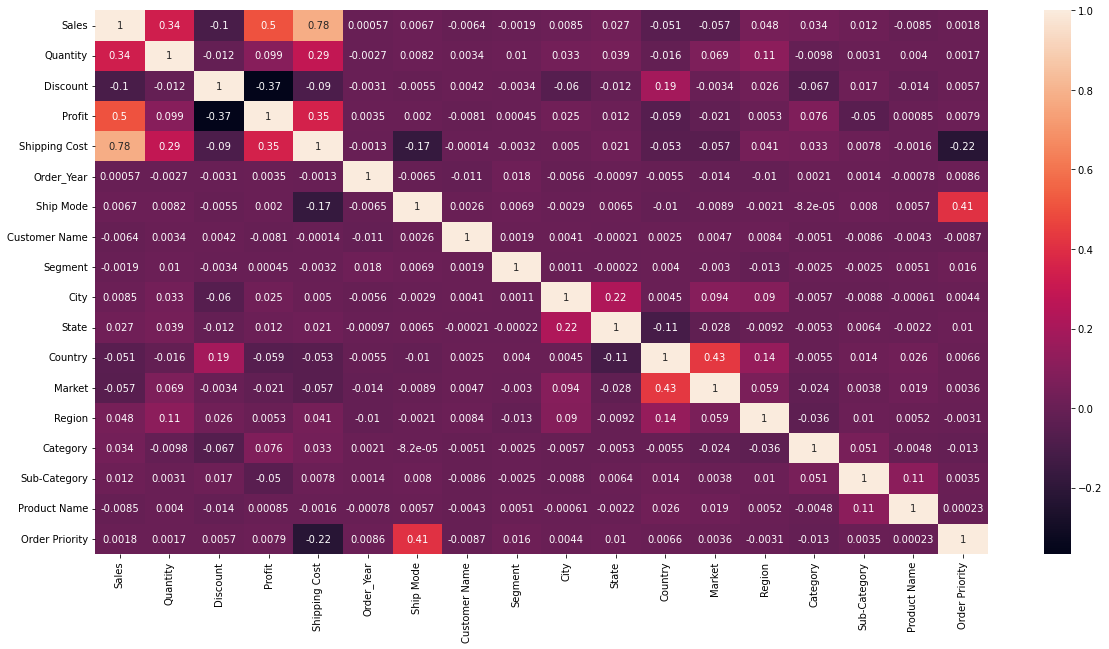

In [148]:
plt.figure(figsize=(20,10))
sns.heatmap(df_tranformed.corr(),annot=True)

In [149]:
df_num1.head()

,Row ID,Sales,Quantity,Discount,Profit,Shipping Cost,Order_Year
0,0.629706,0.131953,0.461538,0.000000,0.490812,1.000000,0.333333
1,0.513560,0.211941,0.615385,0.117647,0.420749,0.989353,0.666667
2,0.493849,0.295703,0.615385,0.117647,0.501331,0.980633,0.666667
3,0.263663,0.165260,0.307692,0.117647,0.433564,0.974924,0.666667
4,0.920665,0.161857,0.538462,0.000000,0.460768,0.967298,0.666667


In [150]:
y=df_num1["Sales"]
x=df_num1.drop("Sales",axis=1)
x=sm.add_constant(x)

In [151]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (17524, 7)
x_test (7511, 7)
y_train (17524,)
y_test (7511,)


In [152]:
OLS_Model_2=sm.OLS(y_train,x_train).fit()
print(OLS_Model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     6734.
Date:                Thu, 11 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:48:41   Log-Likelihood:                 44466.
No. Observations:               17524   AIC:                        -8.892e+04
Df Residuals:                   17517   BIC:                        -8.886e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3260      0.005    -68.206

In [153]:
Update_Score_Card("OLS","OLS_Model_2",OLS_Model_2,x_train,x_test,y_train,y_test)

In [154]:
Score_Card

,Algorithm_Name,Model_Name,R_Square_train,R_Square_test,Train_MSE,Test_MSE,Train_MAE,Test_MAE,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE
0,OLS,OLS_Model_1,0.725234,0.688087,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.352064
1,OLS,OLS_Model_2,0.697576,0.659667,0.000400,0.000400,0.009800,0.010200,0.019100,0.021000,inf,204.863606


# Model-3 MLR Model

In [163]:
y=df_num1["Sales"]
x=df_num1.drop("Sales",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (17524, 6)
x_test (7511, 6)
y_train (17524,)
y_test (7511,)


In [164]:
MLR_Model_3=LinearRegression()
MLR_Model_3.fit(x_train,y_train)

LinearRegression()

In [165]:
Update_Score_Card("MLR","MLR_Model_3",MLR_Model_3,x_train,x_test,y_train,y_test)

In [166]:
Score_Card

,Algorithm_Name,Model_Name,R_Square_train,R_Square_test,Train_MSE,Test_MSE,Train_MAE,Test_MAE,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE
0,OLS,OLS_Model_1,0.725234,0.688087,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.352064
1,OLS,OLS_Model_2,0.697576,0.659667,0.000400,0.000400,0.009800,0.010200,0.019100,0.021000,inf,204.863606
2,MLR,MLR_Model_3,0.697576,0.659667,0.000400,0.000400,0.009800,0.010200,0.019100,0.021000,inf,204.863606


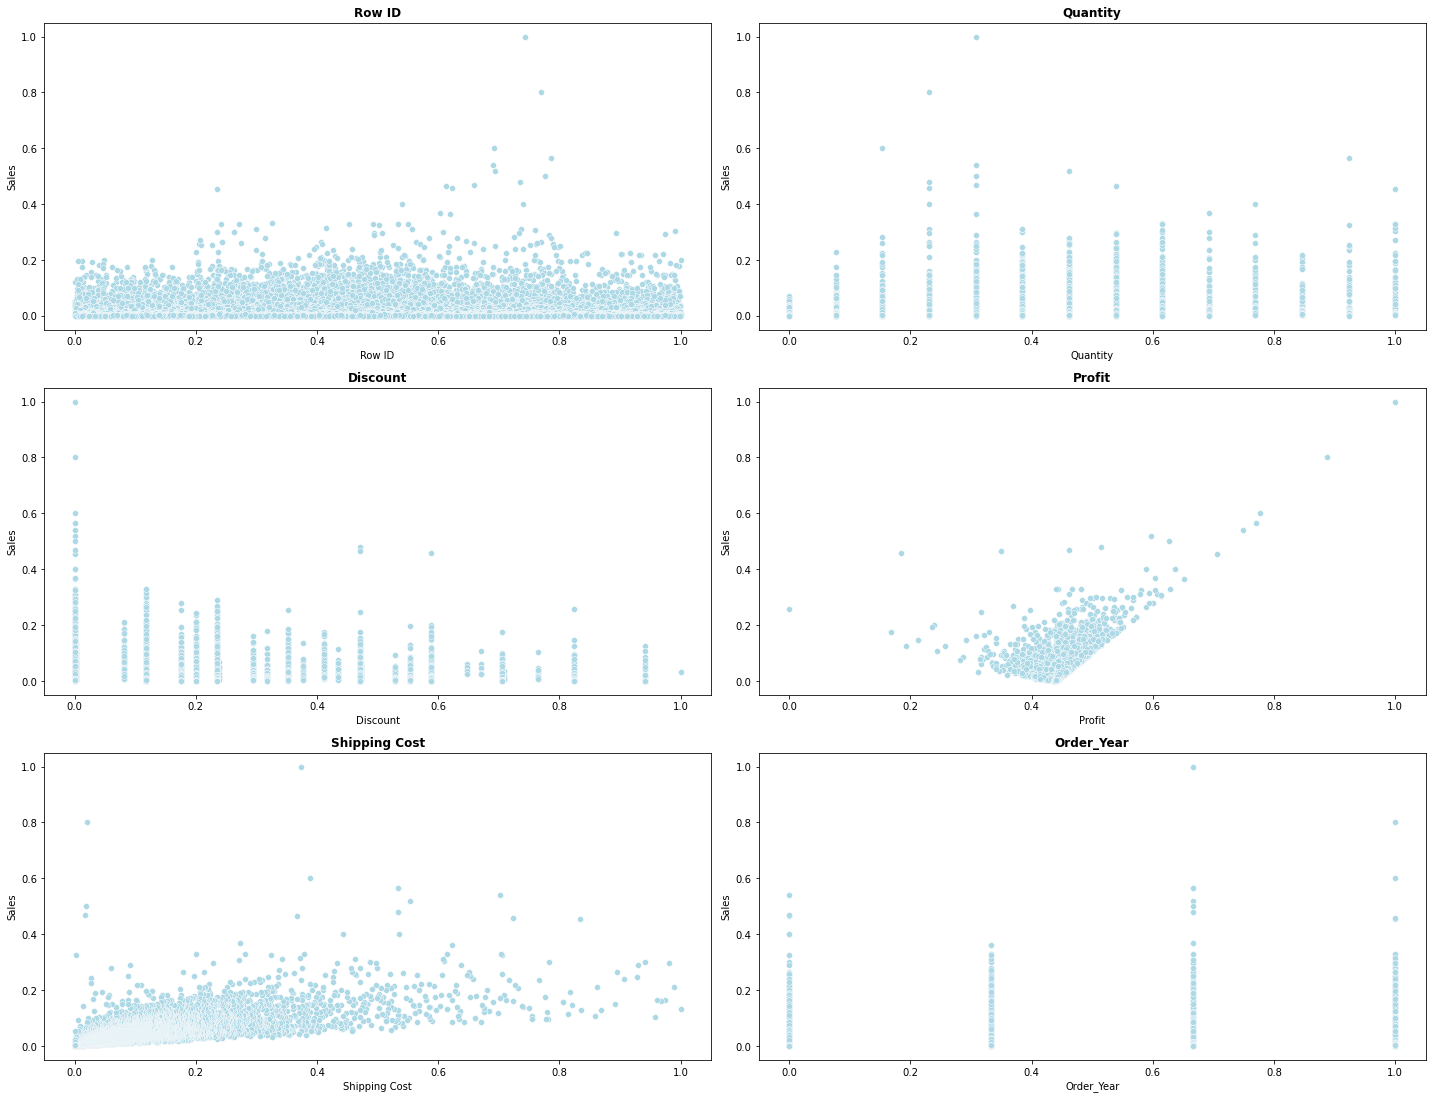

In [175]:
n=1
plt.figure(figsize=(20,20))
for i in df_num1.drop("Sales",axis=1).columns:
    plt.subplot(4,2,n)
    sns.scatterplot(data=df_num1,x=df_num1[i],y=df_num1["Sales"],color="lightblue")
    n=n+1
    plt.title(i,weight="bold")
    plt.tight_layout()

In [179]:
# create vector of result parmeters
name = ['f-value','p-value']

# perform Breusch-Pagan test using residuals and independent variables
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(OLS_Model_2.resid, OLS_Model_2.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
# use 'test[2:]' to retrieve the F-statistic and its corresponding p-value 
lzip(name, test[2:])


[('f-value', 289.55234894099533), ('p-value', 0.0)]

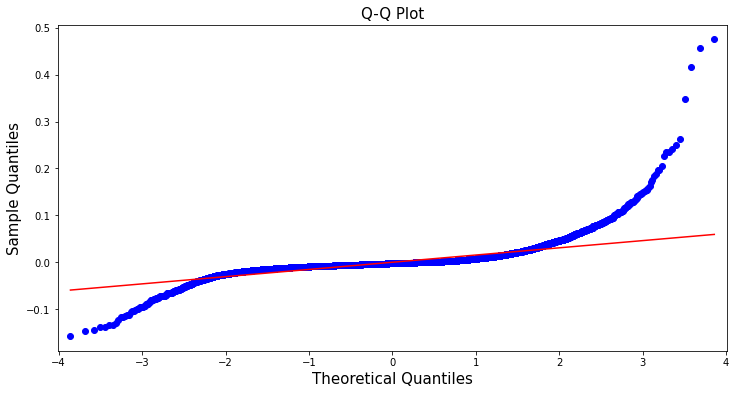

In [181]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [12,6]

# plot the Q-Q plot
# 'r' represents the regression line
qqplot(OLS_Model_2.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

# Model-4 SFS_Forward

In [182]:
y=df_tranformed["Sales"]
x=df_tranformed.drop("Sales",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (17524, 17)
x_test (7511, 17)
y_train (17524,)
y_test (7511,)


In [185]:
linreg=LinearRegression()
linreg_forward=sfs(estimator=linreg,k_features=7,forward=True,verbose=0,scoring='r2')
linreg_forward.fit(x_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=7,
                          scoring='r2')

In [186]:
print(linreg_forward.k_feature_names_)

('Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Ship Mode', 'Sub-Category', 'Order Priority')


In [187]:
print(linreg_forward.k_score_)

0.7157125382670901


In [188]:
y=df_tranformed["Sales"]
x=df_tranformed[['Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Ship Mode', 'Sub-Category', 'Order Priority']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (17524, 7)
x_test (7511, 7)
y_train (17524,)
y_test (7511,)


In [189]:
sfs_forward_features=LinearRegression()
sfs_forward_features.fit(x_train,y_train)

LinearRegression()

In [190]:
Update_Score_Card("SFS_FORWARD","sfs_forward_features",sfs_forward_features,x_train,x_test,y_train,y_test)

In [191]:
Score_Card

,Algorithm_Name,Model_Name,R_Square_train,R_Square_test,Train_MSE,Test_MSE,Train_MAE,Test_MAE,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE
0,OLS,OLS_Model_1,0.725234,0.688087,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.352064
1,OLS,OLS_Model_2,0.697576,0.659667,0.000400,0.000400,0.009800,0.010200,0.019100,0.021000,inf,204.863606
2,MLR,MLR_Model_3,0.697576,0.659667,0.000400,0.000400,0.009800,0.010200,0.019100,0.021000,inf,204.863606
3,SFS_FORWARD,sfs_forward_features,0.724715,0.687700,0.000300,0.000400,0.009700,0.010100,0.018300,0.020100,inf,253.335043


# Model-5 SFS-Forward K_Features=Best

In [192]:
y=df_tranformed["Sales"]
x=df_tranformed.drop("Sales",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (17524, 17)
x_test (7511, 17)
y_train (17524,)
y_test (7511,)


In [225]:
linreg=LinearRegression()
Linreg_Forward_Best_4=sfs(estimator=linreg,k_features="best",verbose=0,forward=True,scoring="r2")
Linreg_Forward_Best_4.fit(x_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features='best',
                          scoring='r2')

In [194]:
print(Linreg_Forward_Best_4.k_feature_names_)

('Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Ship Mode', 'Market', 'Region', 'Sub-Category', 'Product Name', 'Order Priority')


In [195]:
print(Linreg_Forward_Best_4.k_score_)

0.7160730898820484


In [198]:
y=df_tranformed["Sales"]
x=df_tranformed[['Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Ship Mode',
                 'Market', 'Region', 'Sub-Category', 'Product Name', 'Order Priority']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (17524, 10)
x_test (7511, 10)
y_train (17524,)
y_test (7511,)


In [200]:
sfs_forward_best=LinearRegression()
sfs_forward_best.fit(x_train,y_train)

LinearRegression()

In [201]:
Update_Score_Card("SFS Forward Best","sfs_forward_best",sfs_forward_best,x_train,x_test,y_train,y_test)

In [202]:
Score_Card

,Algorithm_Name,Model_Name,R_Square_train,R_Square_test,Train_MSE,Test_MSE,Train_MAE,Test_MAE,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE
0,OLS,OLS_Model_1,0.725234,0.688087,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.352064
1,OLS,OLS_Model_2,0.697576,0.659667,0.000400,0.000400,0.009800,0.010200,0.019100,0.021000,inf,204.863606
2,MLR,MLR_Model_3,0.697576,0.659667,0.000400,0.000400,0.009800,0.010200,0.019100,0.021000,inf,204.863606
3,SFS_FORWARD,sfs_forward_features,0.724715,0.687700,0.000300,0.000400,0.009700,0.010100,0.018300,0.020100,inf,253.335043
4,SFS Forward Best,sfs_forward_best,0.725160,0.688126,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.247671


# M-6 SFS Backward Elimination k features=7

In [205]:
y=df_tranformed["Sales"]
x=df_tranformed.drop("Sales",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (17524, 17)
x_test (7511, 17)
y_train (17524,)
y_test (7511,)


In [210]:
linreg=LinearRegression()
linreg_backward=sfs(estimator=linreg,forward=False, k_features=7,verbose=0,scoring="r2")
linreg_backward.fit(x_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=7, scoring='r2')

In [208]:
print(linreg_backward.k_score_)

0.7157125382670905


In [209]:
print(linreg_backward.k_feature_names_)

('Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Ship Mode', 'Sub-Category', 'Order Priority')


In [212]:
y=df_tranformed["Sales"]
x=df_tranformed[['Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Ship Mode', 'Sub-Category', 'Order Priority']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (17524, 7)
x_test (7511, 7)
y_train (17524,)
y_test (7511,)


In [214]:
sfs_backward=LinearRegression()
sfs_backward.fit(x_train,y_train)

LinearRegression()

In [215]:
Update_Score_Card("SFS Backward","sfs_backward",sfs_backward,x_train,x_test,y_train,y_test)

In [216]:
Score_Card

,Algorithm_Name,Model_Name,R_Square_train,R_Square_test,Train_MSE,Test_MSE,Train_MAE,Test_MAE,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE
0,OLS,OLS_Model_1,0.725234,0.688087,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.352064
1,OLS,OLS_Model_2,0.697576,0.659667,0.000400,0.000400,0.009800,0.010200,0.019100,0.021000,inf,204.863606
2,MLR,MLR_Model_3,0.697576,0.659667,0.000400,0.000400,0.009800,0.010200,0.019100,0.021000,inf,204.863606
3,SFS_FORWARD,sfs_forward_features,0.724715,0.687700,0.000300,0.000400,0.009700,0.010100,0.018300,0.020100,inf,253.335043
4,SFS Forward Best,sfs_forward_best,0.725160,0.688126,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.247671
5,SFS Backward,sfs_backward,0.724715,0.687700,0.000300,0.000400,0.009700,0.010100,0.018300,0.020100,inf,253.335043


# M-7 SFS Backward Elimination k features=BEST

In [217]:
y=df_tranformed["Sales"]
x=df_tranformed.drop("Sales",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (17524, 17)
x_test (7511, 17)
y_train (17524,)
y_test (7511,)


In [218]:
linreg=LinearRegression()
linreg_backward_best=sfs(estimator=linreg,k_features="best",scoring="r2",verbose=0,forward=False)
linreg_backward_best.fit(x_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features='best', scoring='r2')

In [219]:
print(linreg_backward_best.k_score_)

0.7160730898820484


In [220]:
print(linreg_backward_best.k_feature_names_)

('Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Ship Mode', 'Market', 'Region', 'Sub-Category', 'Product Name', 'Order Priority')


In [221]:
y=df_tranformed["Sales"]
x=df_tranformed[['Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Ship Mode', 'Market',
                 'Region', 'Sub-Category', 'Product Name', 'Order Priority']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (17524, 10)
x_test (7511, 10)
y_train (17524,)
y_test (7511,)


In [222]:
sfs_backward_best=LinearRegression()
sfs_backward_best.fit(x_train,y_train)


LinearRegression()

In [223]:
Update_Score_Card("SFS Backward Best","sfs_backward_best",sfs_backward_best,x_train,x_test,y_train,y_test)

In [224]:
Score_Card

,Algorithm_Name,Model_Name,R_Square_train,R_Square_test,Train_MSE,Test_MSE,Train_MAE,Test_MAE,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE
0,OLS,OLS_Model_1,0.725234,0.688087,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.352064
1,OLS,OLS_Model_2,0.697576,0.659667,0.000400,0.000400,0.009800,0.010200,0.019100,0.021000,inf,204.863606
2,MLR,MLR_Model_3,0.697576,0.659667,0.000400,0.000400,0.009800,0.010200,0.019100,0.021000,inf,204.863606
3,SFS_FORWARD,sfs_forward_features,0.724715,0.687700,0.000300,0.000400,0.009700,0.010100,0.018300,0.020100,inf,253.335043
4,SFS Forward Best,sfs_forward_best,0.725160,0.688126,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.247671
5,SFS Backward,sfs_backward,0.724715,0.687700,0.000300,0.000400,0.009700,0.010100,0.018300,0.020100,inf,253.335043
6,SFS Backward Best,sfs_backward_best,0.725160,0.688126,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.247671


# M-8 SFS RECURSIVE FEATURE ELIMINATION TAKING K=5

In [226]:
y=df_tranformed["Sales"]
x=df_tranformed.drop("Sales",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (17524, 17)
x_test (7511, 17)
y_train (17524,)
y_test (7511,)


In [229]:
linreg=LinearRegression()
linreg_rfe=RFE(estimator=linreg,verbose=0,n_features_to_select=5)
linreg_rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [231]:
test=pd.Series(data=linreg_rfe.ranking_,index=x.columns)

In [234]:
test[test==1].index

Index(['Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority'], dtype='object')

In [237]:
y=df_tranformed["Sales"]
x=df_tranformed[['Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (17524, 5)
x_test (7511, 5)
y_train (17524,)
y_test (7511,)


In [242]:
linreg_rfe=LinearRegression()
linreg_rfe.fit(x_train,y_train)

LinearRegression()

In [243]:
Update_Score_Card("RFE","linreg_rfe",linreg_rfe,x_train,x_test,y_train,y_test)

In [244]:
Score_Card

,Algorithm_Name,Model_Name,R_Square_train,R_Square_test,Train_MSE,Test_MSE,Train_MAE,Test_MAE,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE
0,OLS,OLS_Model_1,0.725234,0.688087,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.352064
1,OLS,OLS_Model_2,0.697576,0.659667,0.000400,0.000400,0.009800,0.010200,0.019100,0.021000,inf,204.863606
2,MLR,MLR_Model_3,0.697576,0.659667,0.000400,0.000400,0.009800,0.010200,0.019100,0.021000,inf,204.863606
3,SFS_FORWARD,sfs_forward_features,0.724715,0.687700,0.000300,0.000400,0.009700,0.010100,0.018300,0.020100,inf,253.335043
4,SFS Forward Best,sfs_forward_best,0.725160,0.688126,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.247671
5,SFS Backward,sfs_backward,0.724715,0.687700,0.000300,0.000400,0.009700,0.010100,0.018300,0.020100,inf,253.335043
6,SFS Backward Best,sfs_backward_best,0.725160,0.688126,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.247671
7,RFE,linreg_rfe,0.719553,0.682139,0.000300,0.000400,0.009800,0.010100,0.018400,0.020300,inf,250.476494


# M-9 Kfold Cross validation using cross val score

In [284]:
y=df_tranformed["Sales"]
x=df_tranformed.drop("Sales",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (17524, 17)
x_test (7511, 17)
y_train (17524,)
y_test (7511,)


In [285]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [289]:
scores_train=cross_val_score(estimator=linreg,X=x_train,y=y_train, scoring='r2',cv=10)

In [290]:
scores_train

array([0.72264261, 0.70558972, 0.72777492, 0.69869562, 0.67936119,
       0.78966719, 0.71882464, 0.73349746, 0.69545608, 0.7240309 ])

In [291]:
print("Maximum Score",scores_train.max())

Maximum Score 0.78966718616814


In [292]:
print("Minimum Score",scores_train.min())

Minimum Score 0.6793611882404262


In [293]:
print("Average Score",scores_train.mean())

Average Score 0.719554032318938


# M-10 Using Stochastic Gradient Descent

In [295]:
y=df_tranformed["Sales"]
x=df_tranformed.drop("Sales",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (17524, 17)
x_test (7511, 17)
y_train (17524,)
y_test (7511,)


In [297]:
sgd=SGDRegressor(random_state=1)
sgd.fit(x_train,y_train)


SGDRegressor(random_state=1)

In [298]:
Update_Score_Card("SGD Regressor","sgd",sgd,x_train,x_test,y_train,y_test)

In [299]:
Score_Card

,Algorithm_Name,Model_Name,R_Square_train,R_Square_test,Train_MSE,Test_MSE,Train_MAE,Test_MAE,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE
0,OLS,OLS_Model_1,0.725234,0.688087,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.352064
1,OLS,OLS_Model_2,0.697576,0.659667,0.000400,0.000400,0.009800,0.010200,0.019100,0.021000,inf,204.863606
2,MLR,MLR_Model_3,0.697576,0.659667,0.000400,0.000400,0.009800,0.010200,0.019100,0.021000,inf,204.863606
3,SFS_FORWARD,sfs_forward_features,0.724715,0.687700,0.000300,0.000400,0.009700,0.010100,0.018300,0.020100,inf,253.335043
4,SFS Forward Best,sfs_forward_best,0.725160,0.688126,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.247671
5,SFS Backward,sfs_backward,0.724715,0.687700,0.000300,0.000400,0.009700,0.010100,0.018300,0.020100,inf,253.335043
6,SFS Backward Best,sfs_backward_best,0.725160,0.688126,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.247671
7,RFE,linreg_rfe,0.719553,0.682139,0.000300,0.000400,0.009800,0.010100,0.018400,0.020300,inf,250.476494
8,SGD Regressor,sgd,-2436940625661056214272794312048640.000000,-2251534882655825738050768881057792.000000,2949518675639666214328315412480.000000,2923021497219304644158123147264.000000,1456369349497117.000000,1447640138159608.250000,1717416279077284.750000,1709684619226395.500000,inf,50446190847699034112.000000


# M-11 Using Ridge Regularization

In [303]:
y=df_tranformed["Sales"]
x=df_tranformed.drop("Sales",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (17524, 17)
x_test (7511, 17)
y_train (17524,)
y_test (7511,)


In [304]:
ridge=Ridge(alpha=1,max_iter=500,random_state=1)
ridge.fit(x_train,y_train)

Ridge(alpha=1, max_iter=500, random_state=1)

In [305]:
Update_Score_Card("Ridge Reg.","ridge",ridge,x_train,x_test,y_train,y_test)

In [306]:
Score_Card

,Algorithm_Name,Model_Name,R_Square_train,R_Square_test,Train_MSE,Test_MSE,Train_MAE,Test_MAE,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE
0,OLS,OLS_Model_1,0.725234,0.688087,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.352064
1,OLS,OLS_Model_2,0.697576,0.659667,0.000400,0.000400,0.009800,0.010200,0.019100,0.021000,inf,204.863606
2,MLR,MLR_Model_3,0.697576,0.659667,0.000400,0.000400,0.009800,0.010200,0.019100,0.021000,inf,204.863606
3,SFS_FORWARD,sfs_forward_features,0.724715,0.687700,0.000300,0.000400,0.009700,0.010100,0.018300,0.020100,inf,253.335043
4,SFS Forward Best,sfs_forward_best,0.725160,0.688126,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.247671
5,SFS Backward,sfs_backward,0.724715,0.687700,0.000300,0.000400,0.009700,0.010100,0.018300,0.020100,inf,253.335043
6,SFS Backward Best,sfs_backward_best,0.725160,0.688126,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.247671
7,RFE,linreg_rfe,0.719553,0.682139,0.000300,0.000400,0.009800,0.010100,0.018400,0.020300,inf,250.476494
8,SGD Regressor,sgd,-2436940625661056214272794312048640.000000,-2251534882655825738050768881057792.000000,2949518675639666214328315412480.000000,2923021497219304644158123147264.000000,1456369349497117.000000,1447640138159608.250000,1717416279077284.750000,1709684619226395.500000,inf,50446190847699034112.000000
9,Ridge Reg.,ridge,0.721129,0.699392,0.000300,0.000400,0.009600,0.010000,0.018400,0.019800,inf,243.009547


# M-12 Using Lasso Regularization

In [308]:
y=df_tranformed["Sales"]
x=df_tranformed.drop("Sales",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (17524, 17)
x_test (7511, 17)
y_train (17524,)
y_test (7511,)


In [310]:
lasso=Lasso(random_state=1,alpha = 0.01, max_iter = 500)
lasso.fit(x_train,y_train)

Lasso(alpha=0.01, max_iter=500, random_state=1)

In [319]:
Update_Score_Card("Lasso Reg","lasso",lasso,x_train,x_test,y_train,y_test)

In [320]:
Score_Card

,Algorithm_Name,Model_Name,R_Square_train,R_Square_test,Train_MSE,Test_MSE,Train_MAE,Test_MAE,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE
0,OLS,OLS_Model_1,0.725234,0.688087,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.352064
1,OLS,OLS_Model_2,0.697576,0.659667,0.000400,0.000400,0.009800,0.010200,0.019100,0.021000,inf,204.863606
2,MLR,MLR_Model_3,0.697576,0.659667,0.000400,0.000400,0.009800,0.010200,0.019100,0.021000,inf,204.863606
3,SFS_FORWARD,sfs_forward_features,0.724715,0.687700,0.000300,0.000400,0.009700,0.010100,0.018300,0.020100,inf,253.335043
4,SFS Forward Best,sfs_forward_best,0.725160,0.688126,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.247671
5,SFS Backward,sfs_backward,0.724715,0.687700,0.000300,0.000400,0.009700,0.010100,0.018300,0.020100,inf,253.335043
6,SFS Backward Best,sfs_backward_best,0.725160,0.688126,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.247671
7,RFE,linreg_rfe,0.719553,0.682139,0.000300,0.000400,0.009800,0.010100,0.018400,0.020300,inf,250.476494
8,SGD Regressor,sgd,-2436940625661056214272794312048640.000000,-2251534882655825738050768881057792.000000,2949518675639666214328315412480.000000,2923021497219304644158123147264.000000,1456369349497117.000000,1447640138159608.250000,1717416279077284.750000,1709684619226395.500000,inf,50446190847699034112.000000
9,Ridge Reg.,ridge,0.721129,0.699392,0.000300,0.000400,0.009600,0.010000,0.018400,0.019800,inf,243.009547


# M-13 Using Elastic Net Regualrization

In [321]:
y=df_tranformed["Sales"]
x=df_tranformed.drop("Sales",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (17524, 17)
x_test (7511, 17)
y_train (17524,)
y_test (7511,)


In [323]:
elasticnet=ElasticNet(alpha=.1,l1_ratio=.01,max_iter=500,random_state=1)
elasticnet.fit(x_train,y_train)

ElasticNet(alpha=0.1, l1_ratio=0.01, max_iter=500, random_state=1)

In [324]:
Update_Score_Card("Elastic Net Reg","elasticnet",elasticnet,x_train,x_test,y_train,y_test)

In [325]:
Score_Card

,Algorithm_Name,Model_Name,R_Square_train,R_Square_test,Train_MSE,Test_MSE,Train_MAE,Test_MAE,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE
0,OLS,OLS_Model_1,0.725234,0.688087,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.352064
1,OLS,OLS_Model_2,0.697576,0.659667,0.000400,0.000400,0.009800,0.010200,0.019100,0.021000,inf,204.863606
2,MLR,MLR_Model_3,0.697576,0.659667,0.000400,0.000400,0.009800,0.010200,0.019100,0.021000,inf,204.863606
3,SFS_FORWARD,sfs_forward_features,0.724715,0.687700,0.000300,0.000400,0.009700,0.010100,0.018300,0.020100,inf,253.335043
4,SFS Forward Best,sfs_forward_best,0.725160,0.688126,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.247671
5,SFS Backward,sfs_backward,0.724715,0.687700,0.000300,0.000400,0.009700,0.010100,0.018300,0.020100,inf,253.335043
6,SFS Backward Best,sfs_backward_best,0.725160,0.688126,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.247671
7,RFE,linreg_rfe,0.719553,0.682139,0.000300,0.000400,0.009800,0.010100,0.018400,0.020300,inf,250.476494
8,SGD Regressor,sgd,-2436940625661056214272794312048640.000000,-2251534882655825738050768881057792.000000,2949518675639666214328315412480.000000,2923021497219304644158123147264.000000,1456369349497117.000000,1447640138159608.250000,1717416279077284.750000,1709684619226395.500000,inf,50446190847699034112.000000
9,Ridge Reg.,ridge,0.721129,0.699392,0.000300,0.000400,0.009600,0.010000,0.018400,0.019800,inf,243.009547


# M-14 Using Grid SearchCV

In [326]:
y=df_tranformed["Sales"]
x=df_tranformed.drop("Sales",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (17524, 17)
x_test (7511, 17)
y_train (17524,)
y_test (7511,)


In [327]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
ridge = Ridge()
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

In [328]:
ridge_grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid=[{'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01,
                                    0.1, 1, 5, 10, 20, 40, 60, 80, 100]}])

In [329]:
print("Best Parameters",ridge_grid.best_params_)

Best Parameters {'alpha': 0.1}


In [330]:
# Making Ridge with Alpha as 0.1

In [332]:
ridge_cv=Ridge(alpha=0.1,max_iter=500,random_state=1)
ridge_cv.fit(x_train,y_train)

Ridge(alpha=0.1, max_iter=500, random_state=1)

In [333]:
Update_Score_Card("Ridge Tuned","ridge_cv",ridge_cv,x_train,x_test,y_train,y_test)

In [334]:
Score_Card

,Algorithm_Name,Model_Name,R_Square_train,R_Square_test,Train_MSE,Test_MSE,Train_MAE,Test_MAE,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE
0,OLS,OLS_Model_1,0.725234,0.688087,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.352064
1,OLS,OLS_Model_2,0.697576,0.659667,0.000400,0.000400,0.009800,0.010200,0.019100,0.021000,inf,204.863606
2,MLR,MLR_Model_3,0.697576,0.659667,0.000400,0.000400,0.009800,0.010200,0.019100,0.021000,inf,204.863606
3,SFS_FORWARD,sfs_forward_features,0.724715,0.687700,0.000300,0.000400,0.009700,0.010100,0.018300,0.020100,inf,253.335043
4,SFS Forward Best,sfs_forward_best,0.725160,0.688126,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.247671
5,SFS Backward,sfs_backward,0.724715,0.687700,0.000300,0.000400,0.009700,0.010100,0.018300,0.020100,inf,253.335043
6,SFS Backward Best,sfs_backward_best,0.725160,0.688126,0.000300,0.000400,0.009700,0.010000,0.018200,0.020100,inf,251.247671
7,RFE,linreg_rfe,0.719553,0.682139,0.000300,0.000400,0.009800,0.010100,0.018400,0.020300,inf,250.476494
8,SGD Regressor,sgd,-2436940625661056214272794312048640.000000,-2251534882655825738050768881057792.000000,2949518675639666214328315412480.000000,2923021497219304644158123147264.000000,1456369349497117.000000,1447640138159608.250000,1717416279077284.750000,1709684619226395.500000,inf,50446190847699034112.000000
9,Ridge Reg.,ridge,0.721129,0.699392,0.000300,0.000400,0.009600,0.010000,0.018400,0.019800,inf,243.009547


In [336]:
ridge_cv.feature_names_in_

array(['Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order_Year',
       'Ship Mode', 'Customer Name', 'Segment', 'City', 'State',
       'Country', 'Market', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Order Priority'], dtype=object)